In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import unc_calc_funcs as ucf

In [2]:
%matplotlib widget

In [3]:

temp_table = np.array([0, 20, 35, 50])
temp_table = temp_table + 273.15

Ps_mmHg, Ps_kPa = ucf.calculate_Ps(T_K = temp_table)

print(Ps_mmHg, Ps_kPa)

[ 4.58445395 17.53942105 42.18999885 92.6439359 ] [ 0.61121     2.33839617  5.62486819 12.35150373]


In [4]:
# reference conditions
RH_ref = 60 # % RH
T_C_ref = 20 # Celcius
T_K_ref = T_C_ref+ 273.15

P_kPa_ref = 96 # kPa

#defining the ranges for temp. - min and max values
# standard
RH_range = np.array([45, 75]) # rel. humidity, %
T_C_range = np.array([15, 25]) # deg. Celcius
P_kPa_range = np.array([86, 106]) # kPa

L_range = np.array([0.1, 20]) # meters

# extended
RH_range_ext = np.array([30, 90]) # rel. humidity, %
T_C_range_ext = np.array([-20, 40]) # deg. Celcius
P_kPa_range_ext = np.array([76, 116]) # kPa

# uncertainty in measurement of P, RH and T during calibration process

# unc. in distance measurement for all the range
delta_L = 0.25*1e-3 # 0.25 mm
delta_T_C = 0.5 # 0.5 deg Celcius
delta_P_kPa = 1 # kPa
delta_RH = 2.5 # percent

In [5]:
# calculate the dielectric permettivity for reference conditions
eps_ref = ucf.calculate_eps_air(RH = RH_ref,
                                T = T_K_ref,
                                P = ucf.convert_P_kPa_to_P_mmHg(P_kPa = P_kPa_ref))

print(eps_ref[0], eps_ref[1])

8.859686934466997e-12 1.0006423011595886


In [6]:
# calculate the dielectric permettivity for reference conditions
eps_RH_T_P = ucf.calculate_eps_air(RH = 55,
                                T = 30+273.15,
                                P = ucf.convert_P_kPa_to_P_mmHg(P_kPa = 106)
                                )

print(eps_RH_T_P [0], eps_RH_T_P [1])

8.860608043934838e-12 1.0007463343048157


In [7]:
# Example Inputs
RH = 60  # %RH
T = 293.15  # K (20°C)
P = 760  # mmHg

delta_RH = 2.5  # %RH
delta_T = 0.5  # K
delta_P = 1 * 7.50062  # 1 kPa =>  mmHg

# Calculate ε_air and its uncertainty
eps_air_rel, delta_eps_air_rel = ucf.calculate_rel_eps_with_uncertainty(RH, T, P, delta_RH, delta_T, delta_P)

print(f"ε_air: {eps_air_rel:.6e} ")
print(f"Δε_air: {delta_eps_air_rel:.6e} ")

ε_air: 1.000671e+00 
Δε_air: 7.875025e-06 


In [30]:
# Define ranges and grids for calculations

RH_range = np.linspace(45, 75, 101)  # Relative Humidity (%)
T_C_range = np.linspace(15, 25, 101)  # Temperature (°C)
T_K_range = T_C_range + 273.15  # Convert to Temperature (K)
P_kPa_range = np.linspace(86, 106, 101)  # Pressure (kPa)
P_mmHg_range = P_kPa_range * 7.50062  # Convert kPa to mmHg

# Convert ranges to grids
RH_grid, T_K_grid, P_mmHg_grid = np.meshgrid(RH_range, T_K_range, P_mmHg_range)

# Initialize arrays for results
eps_rel_grid = np.zeros_like(RH_grid)
delta_eps_rel_grid = np.zeros_like(RH_grid)

# Calculate relative permittivity and uncertainty on the grid
for i in range(RH_grid.shape[0]):
    for j in range(RH_grid.shape[1]):
        for k in range(RH_grid.shape[2]):
            cur_RH = RH_grid[i, j, k]
            cur_T = T_K_grid[i, j, k]
            cur_P = P_mmHg_grid[i, j, k]

            # Calculate relative permittivity
            eps_rel, delta_eps_rel = ucf.calculate_rel_eps_with_uncertainty(cur_RH, cur_T, cur_P, delta_RH, delta_T, delta_P)
            eps_rel_grid[i, j, k] = eps_rel
            delta_eps_rel_grid[i, j, k] = delta_eps_rel


In [31]:
eps_rel_grid.shape, delta_eps_rel_grid.shape

((101, 101, 101), (101, 101, 101))

In [32]:
print("Min:", np.min(eps_rel_grid[:, :, 0]))
print("Max:", np.max(eps_rel_grid[:, :, 0]))

Min: 1.0005425617078942
Max: 1.0006595561495648


In [33]:
print("eps_rel_grid range:", np.min(eps_rel_grid), np.max(eps_rel_grid))
print("delta_eps_rel_grid range:", np.min(delta_eps_rel_grid), np.max(delta_eps_rel_grid))

eps_rel_grid range: 1.0005425617078942 1.0007657195451711
delta_eps_rel_grid range: 6.811419081916104e-06 9.75563464159197e-06


Temp index: 100
temp value: 298.15 when provided: 298.15
[288.15 288.25 288.35 288.45 288.55 288.65 288.75 288.85 288.95 289.05
 289.15 289.25 289.35 289.45 289.55 289.65 289.75 289.85 289.95 290.05
 290.15 290.25 290.35 290.45 290.55 290.65 290.75 290.85 290.95 291.05
 291.15 291.25 291.35 291.45 291.55 291.65 291.75 291.85 291.95 292.05
 292.15 292.25 292.35 292.45 292.55 292.65 292.75 292.85 292.95 293.05
 293.15 293.25 293.35 293.45 293.55 293.65 293.75 293.85 293.95 294.05
 294.15 294.25 294.35 294.45 294.55 294.65 294.75 294.85 294.95 295.05
 295.15 295.25 295.35 295.45 295.55 295.65 295.75 295.85 295.95 296.05
 296.15 296.25 296.35 296.45 296.55 296.65 296.75 296.85 296.95 297.05
 297.15 297.25 297.35 297.45 297.55 297.65 297.75 297.85 297.95 298.05
 298.15]
lower bound: 1.000681517310941, upper bound: 1.0007004402934574
reference_value: " 1.0006909788021991+-9.46149125815423e-06


/tmp/ipykernel_2303/801928920.py:48: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, within_bounds.astype(float), levels=[0.5], colors='red', linewidths=2, label='Uncertainty Region')


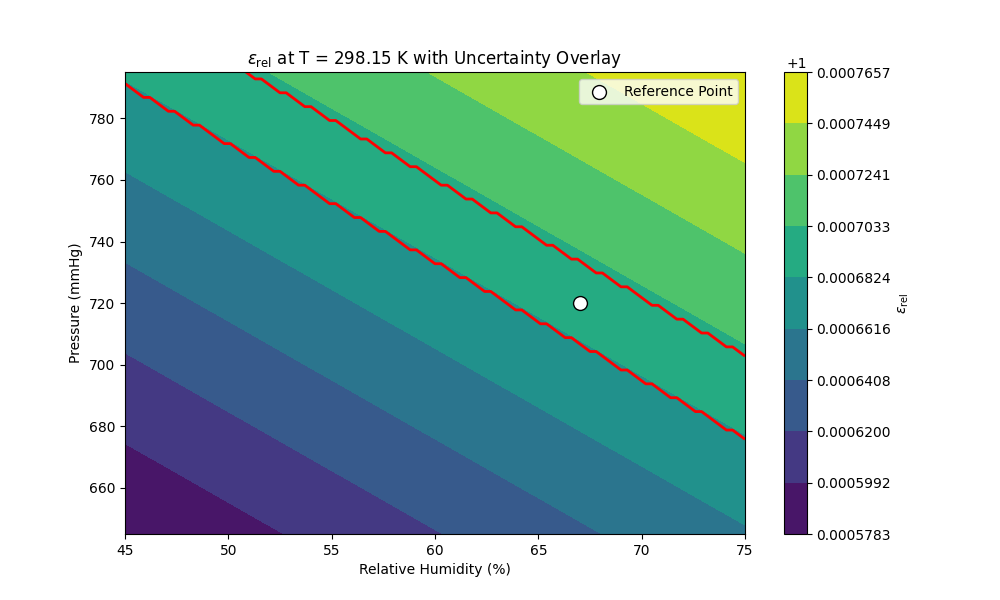

In [38]:
# Simple contour plot function with uncertainty overlay
# Simple contour plot function with uncertainty overlay
def plot_contours_with_uncertainty(
    X, Y, Z, ref_value, delta_ref, RH_ref, P_mmHg_ref, xlabel, ylabel, title
):
    """
    Plot contours with an overlay showing the uncertainty region clearly.

    Parameters:
    X : ndarray
        X-axis values (e.g., Relative Humidity).
    Y : ndarray
        Y-axis values (e.g., Pressure).
    Z : ndarray
        Z-axis values (e.g., Relative Permittivity).
    ref_value : float
        Reference value for Z (e.g., reference permittivity).
    delta_ref : float
        Uncertainty range for Z (e.g., delta permittivity).
    RH_ref : float
        Reference value for X-axis (e.g., reference RH).
    P_mmHg_ref : float
        Reference value for Y-axis (e.g., reference Pressure).
    xlabel : str
        Label for X-axis.
    ylabel : str
        Label for Y-axis.
    title : str
        Plot title.
    """
    plt.figure(figsize=(10, 6))

    # Plot the relative permittivity
    levels = np.linspace(np.min(Z), np.max(Z), 10)  # Dynamically set levels
    cp = plt.contourf(X, Y, Z, levels=levels, cmap='viridis')
    plt.colorbar(cp, label=r'$\varepsilon_{\text{rel}}$')

    # Define bounds for the uncertainty region
    lower_bound = ref_value - delta_ref
    upper_bound = ref_value + delta_ref

    within_bounds = (Z >= lower_bound) & (Z <= upper_bound)

    print(f'lower bound: {lower_bound}, upper bound: {upper_bound}')
    print(f'reference_value: " {ref_value}+-{delta_ref}')

    # Add contour line to show boundary of the uncertainty region
    plt.contour(X, Y, within_bounds.astype(float), levels=[0.5], colors='red', linewidths=2, label='Uncertainty Region')

    # Mark the reference point
    plt.scatter(RH_ref, P_mmHg_ref, color='white', edgecolor='black', s=100, label='Reference Point')

    # Titles and labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Example Input
# Reference conditions - point
RH_ref = 67  # % RH
T_K_ref = 298.15  # K 
P_mmHg_ref = 96 * 7.50062  # mmHg

fixed_T_idx = np.argmin(np.abs(T_K_range - T_K_ref))  # Fixed temperature index - closest
print(f'Temp index: {fixed_T_idx}')
print(f'temp value: {T_K_range[fixed_T_idx]} when provided: {T_K_ref}')
print(T_K_range)

# calculation of reference values:
ref_eps, ref_delta_eps = ucf.calculate_rel_eps_with_uncertainty(RH_ref, T_K_ref, P_mmHg_ref, delta_RH, delta_T, delta_P)

# Plot contours with uncertainty overlay
plot_contours_with_uncertainty(
    X = RH_range,
    Y = P_mmHg_range,
    Z = eps_rel_grid[fixed_T_idx, :, :].T,  # Transpose to align dimensions
    ref_value=ref_eps,
    delta_ref = ref_delta_eps,
    RH_ref = RH_ref, 
    P_mmHg_ref = P_mmHg_ref,
    xlabel='Relative Humidity (%)',
    ylabel='Pressure (mmHg)',
    title=r'$\varepsilon_\text{rel}$ at T = ' + f'{T_K_ref} K with Uncertainty Overlay'
)


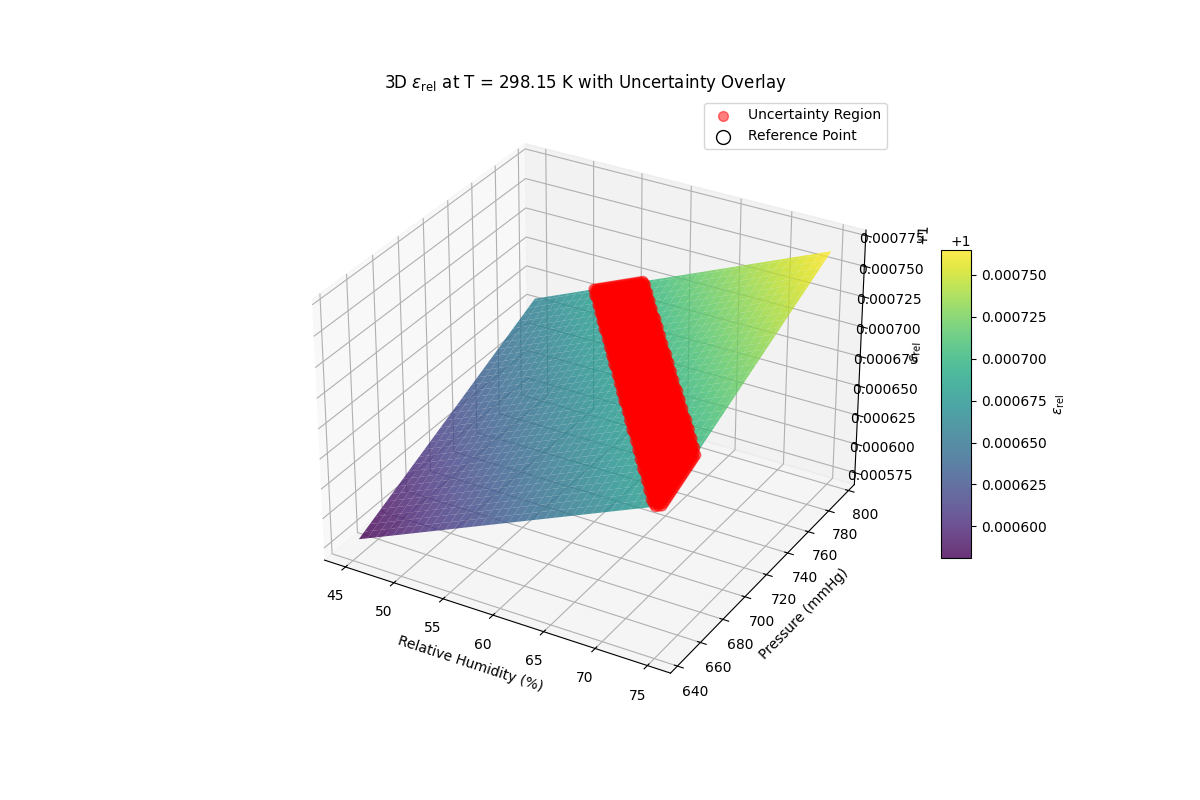

In [40]:
def plot_3D_with_uncertainty(
    X, Y, Z, ref_value, delta_ref, RH_ref, P_mmHg_ref, xlabel, ylabel, zlabel, title
):
    """
    Plot a 3D surface with uncertainty region around the reference point.

    Parameters:
    X : ndarray
        X-axis values (e.g., Relative Humidity).
    Y : ndarray
        Y-axis values (e.g., Pressure).
    Z : ndarray
        Z-axis values (e.g., Relative Permittivity).
    ref_value : float
        Reference value for Z (e.g., reference permittivity).
    delta_ref : float
        Uncertainty range for Z (e.g., delta permittivity).
    RH_ref : float
        Reference value for X-axis (e.g., reference RH).
    P_mmHg_ref : float
        Reference value for Y-axis (e.g., reference Pressure).
    xlabel : str
        Label for X-axis.
    ylabel : str
        Label for Y-axis.
    zlabel : str
        Label for Z-axis.
    title : str
        Plot title.
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create the surface plot for relative permittivity
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    # Overlay uncertainty region
    lower_bound = ref_value - delta_ref
    upper_bound = ref_value + delta_ref
    within_bounds = (Z >= lower_bound) & (Z <= upper_bound)

    # Add points for the uncertainty region
    ax.scatter(
        X[within_bounds], Y[within_bounds], Z[within_bounds],
        color='red', s=50, alpha=0.5, label='Uncertainty Region'
    )

    # Mark the reference point
    ax.scatter(
        RH_ref, P_mmHg_ref, ref_value, color='white', edgecolor='black', s=100, label='Reference Point'
    )

    # Add labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)

    # Add legend
    ax.legend()
    plt.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label=r'$\varepsilon_{\text{rel}}$')
    plt.show()


# 3D Plot
plot_3D_with_uncertainty(
    X=RH_range,
    Y=P_mmHg_range,
    Z=eps_rel_grid[fixed_T_idx, :, :],
    ref_value=ref_eps,
    delta_ref=ref_delta_eps,
    RH_ref=RH_ref,
    P_mmHg_ref=P_mmHg_ref,
    xlabel='Relative Humidity (%)',
    ylabel='Pressure (mmHg)',
    zlabel=r'$\varepsilon_{\text{rel}}$',
    title=r'3D $\varepsilon_\text{rel}$ at T = ' + f'{T_K_ref} K with Uncertainty Overlay'
)

In [13]:
T_K_range

array([288.15, 288.65, 289.15, 289.65, 290.15, 290.65, 291.15, 291.65,
       292.15, 292.65, 293.15, 293.65, 294.15, 294.65, 295.15, 295.65,
       296.15, 296.65, 297.15, 297.65, 298.15])